<a href="https://colab.research.google.com/github/wajdizar/waj/blob/master/MScFE_610_GWP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install arch
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch.unitroot import ADF, KPSS
from statsmodels.tsa.api import VAR
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay


plt.rcParams['figure.figsize'] = (16, 9)

In [ ]:
df = yf.download(['TSLA', 'NVDA'], start='2017-01-01', end='2023-04-05')['Close']
df.dropna(inplace=True)
df.head(10)

[*********************100%***********************]  2 of 2 completed


,NVDA,TSLA
Date,,
2017-01-03,25.502501,14.466000
2017-01-04,26.097500,15.132667
2017-01-05,25.434999,15.116667
2017-01-06,25.775000,15.267333
2017-01-09,26.820000,15.418667
2017-01-10,26.617500,15.324667
2017-01-11,26.290001,15.315333
2017-01-12,25.860001,15.306000
2017-01-13,25.857500,15.850000


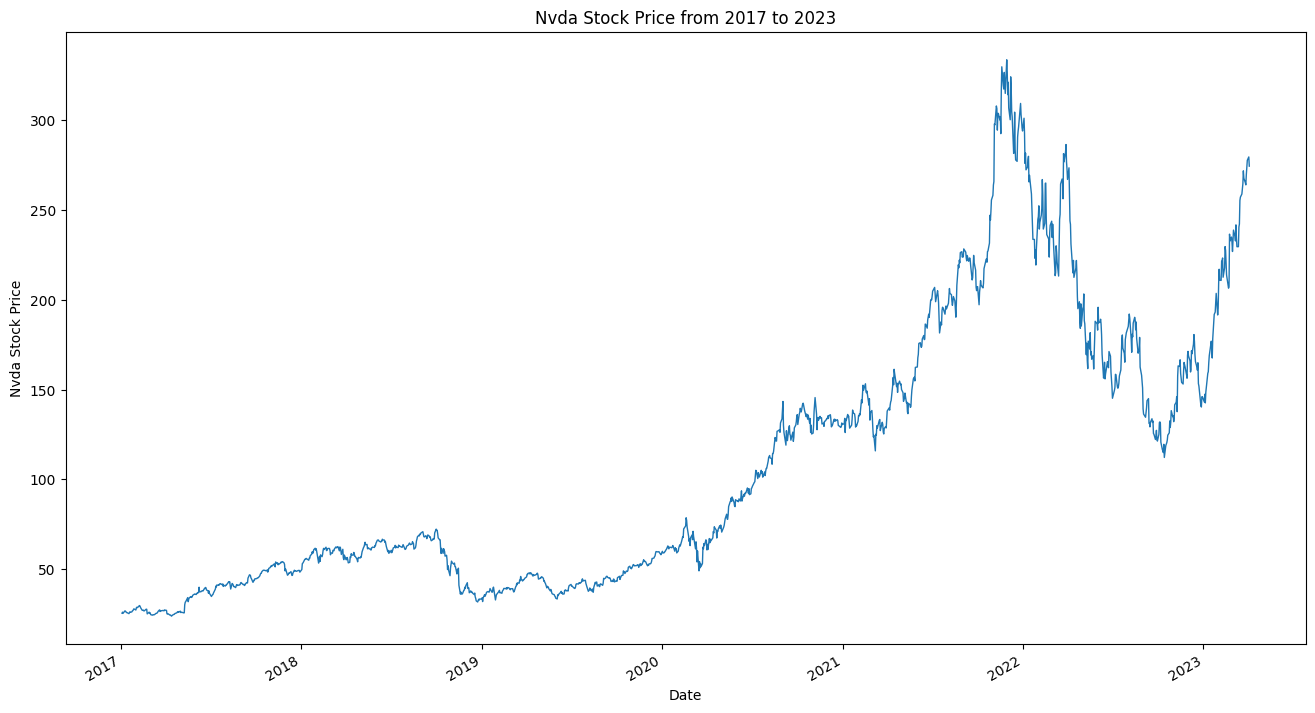

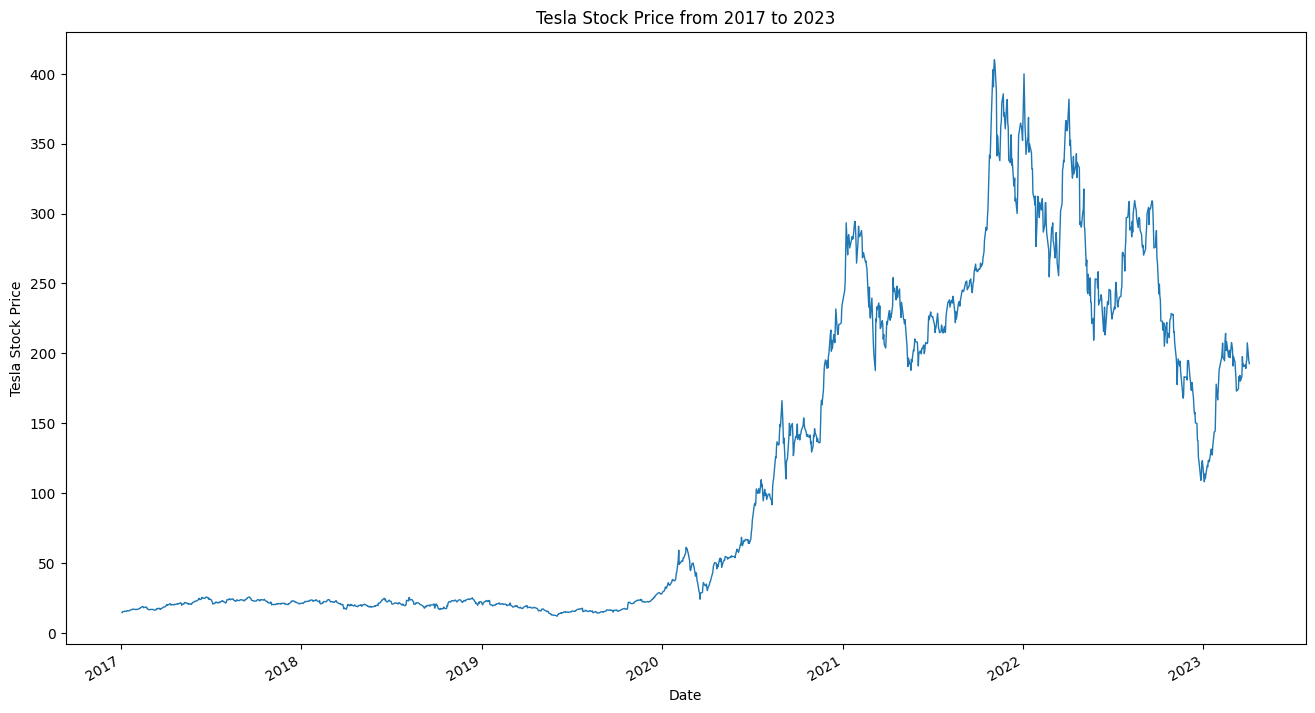

In [ ]:
# Plot price time series chart
df['NVDA'].plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Nvda Stock Price",
    title="Nvda Stock Price from 2017 to 2023",
)
plt.show()
df['TSLA'].plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Tesla Stock Price",
    title="Tesla Stock Price from 2017 to 2023",
)
plt.show()

# Unit Root Testing

In [ ]:
# TSLA Stock Price, ADF Test without Drift and Trend
adf_tsla = ADF(df['TSLA'], trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_tsla.regression.summary())
print("\nTest statistics and critical values: \n", adf_tsla)

Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1123
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                       0.738
Time:                        06:56:40   Log-Likelihood:                         -5152.8
No. Observations:                1573   AIC:                                  1.031e+04
Df Residuals:                    1572   BIC:                                  1.031e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
# NVDA Stock Price, ADF Test without Drift and Trend
adf_nvda = ADF(df['NVDA'], trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_nvda.regression.summary())
print("\nTest statistics and critical values: \n", adf_nvda)

Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8555
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                       0.355
Time:                        06:56:40   Log-Likelihood:                         -4589.9
No. Observations:                1573   AIC:                                      9182.
Df Residuals:                    1572   BIC:                                      9187.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

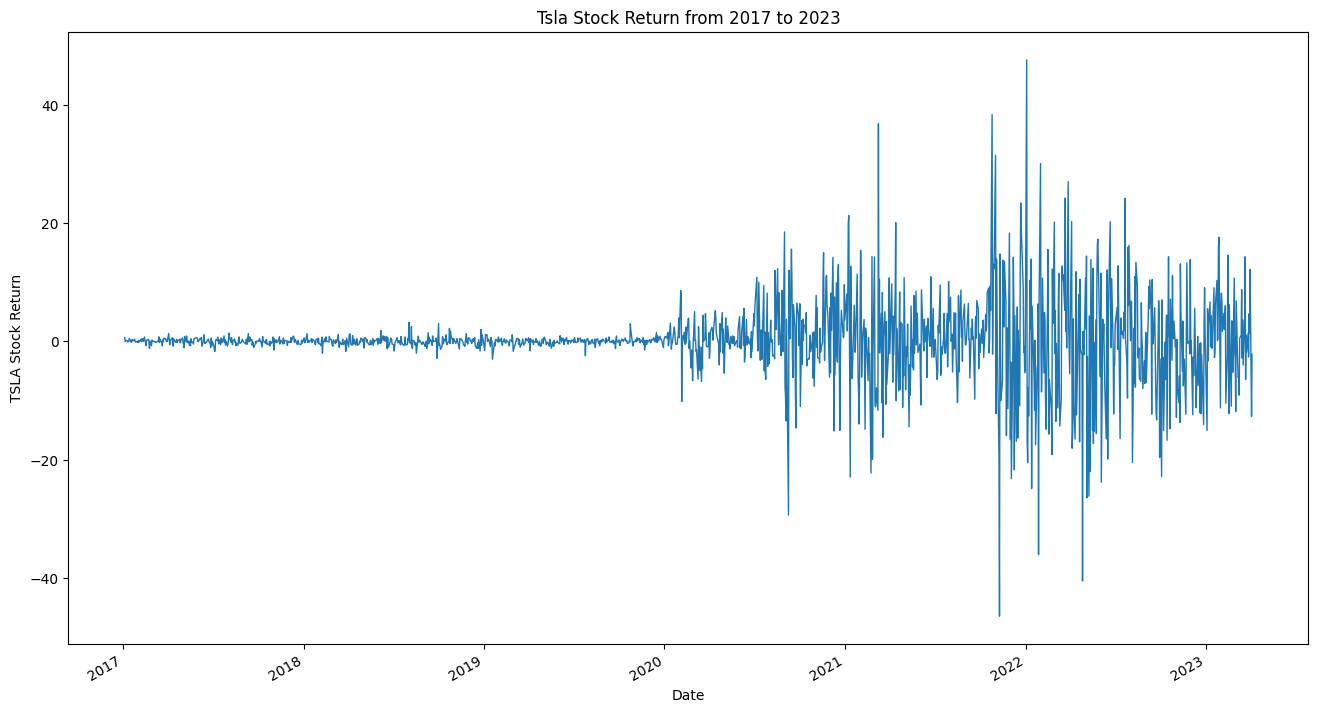

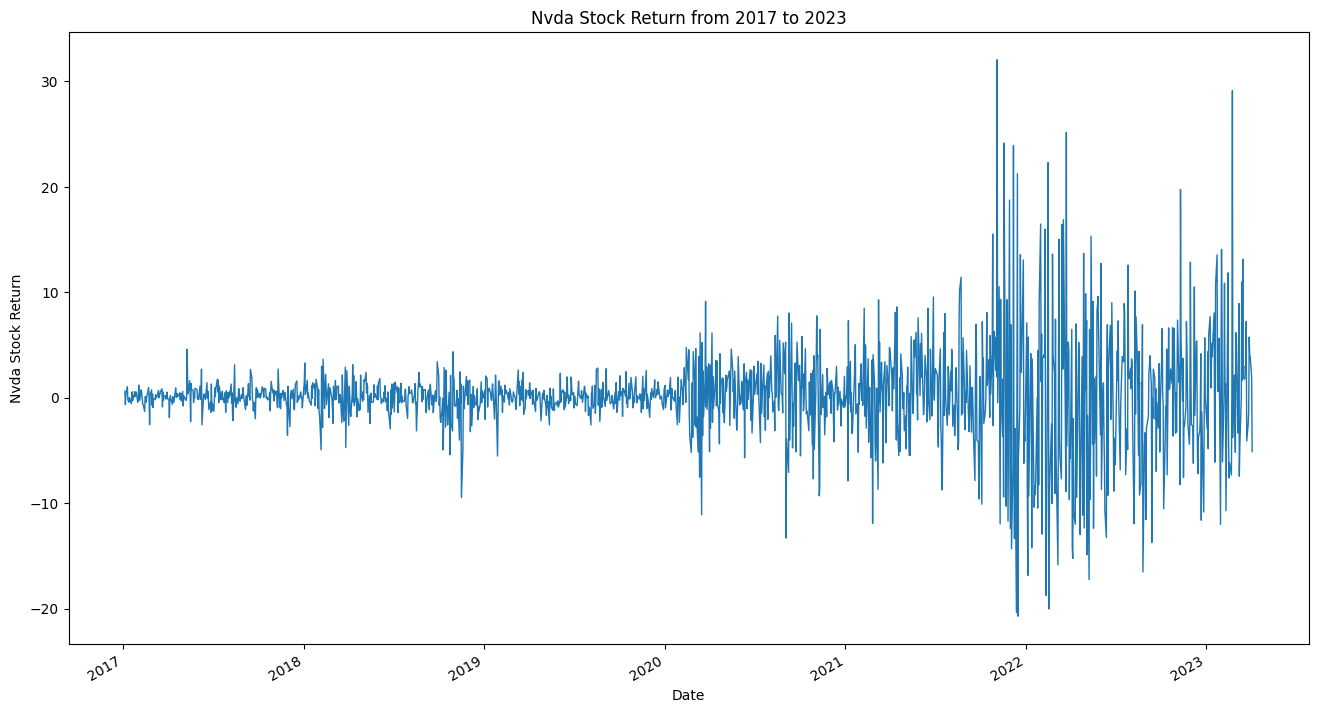

In [ ]:
# Time plots for Stock Returns

df['TSLA'].diff().plot(
    linewidth=1,
    xlabel="Date",
    ylabel="TSLA Stock Return",
    title="Tsla Stock Return from 2017 to 2023")
plt.show()

df['NVDA'].diff().plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Nvda Stock Return",
    title="Nvda Stock Return from 2017 to 2023")

plt.show()

In [ ]:
# ADF Test Results with 5% Significance Level for Differenced TSLA, NVDA
ltsla_adf = ADF(df['TSLA'].diff().dropna(), trend="n", method="bic")
lnvda_adf = ADF(df['NVDA'].diff().dropna(), trend="n", method="bic")

pd.DataFrame(
    {
        "Tsla Stock Return": (ltsla_adf.stat, ltsla_adf.critical_values["5%"]),
        "| Nvda Stock Return": (lnvda_adf.stat, lnvda_adf.critical_values["5%"])},
    index=["ADF Test Statistic", "5% Critical Value"],
)

,Tsla Stock Return,| Nvda Stock Return
ADF Test Statistic,-41.342282,-40.945016
5% Critical Value,-1.941172,-1.941172


In [ ]:
from arch.unitroot.cointegration import phillips_ouliaris
print(
    phillips_ouliaris(
        df.TSLA, df.NVDA, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -10.551931259567711
P-value: 0.30516679246714074
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 15.318
Trend: c
Distribution Order: 3


In [ ]:
print(
    phillips_ouliaris(
        df.TSLA.diff().dropna(), df.NVDA.diff().dropna(), trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -1829.2846863791249
P-value: 0.0
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 12.794
Trend: c
Distribution Order: 3


In [ ]:
# Error Correction Model Result for of TSLA on NVDA with a lag =1
from statsmodels.tsa.ardl import UECM
ecm_model = UECM(
    endog=pd.DataFrame(df.TSLA),
    lags=1,
    exog=pd.DataFrame(df.NVDA),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:                 D.TSLA   No. Observations:                 1574
Model:                     UECM(1, 1)   Log Likelihood               -4890.106
Method:               Conditional MLE   S.D. of innovations            162.382
Date:                Mon, 10 Apr 2023   AIC                           9790.212
Time:                        06:57:30   BIC                           9817.016
Sample:                             1   HQIC                          9800.174
                                 1574                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2910      0.263     -1.105      0.270      -0.808       0.226
TSLA.L1       -0.0079      0.003     -2.493      0.013      -0.014      -0.002
NVDA.L1        0.0111      0.005      2.323      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Error Correction Model Result for I(1) of TSLA on I(1) NVDA with a lag =1
from statsmodels.tsa.ardl import UECM
ecm_model_I = UECM(
    endog=pd.DataFrame(df.TSLA.diff().dropna()),
    lags=1,
    exog=pd.DataFrame(df.NVDA.diff().dropna()),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:                 D.TSLA   No. Observations:                 1574
Model:                     UECM(1, 1)   Log Likelihood               -4890.106
Method:               Conditional MLE   S.D. of innovations            162.382
Date:                Mon, 10 Apr 2023   AIC                           9790.212
Time:                        06:58:20   BIC                           9817.016
Sample:                             1   HQIC                          9800.174
                                 1574                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2910      0.263     -1.105      0.270      -0.808       0.226
TSLA.L1       -0.0079      0.003     -2.493      0.013      -0.014      -0.002
NVDA.L1        0.0111      0.005      2.323      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Durbin-Watson Test Result for ECM of I(1) TSLA and NVDA
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(ecm_model.fittedvalues))
print(durbin_watson(ecm_model_I.fittedvalues))

2.0183437266473967
2.4705590195508287


In [ ]:
# VAR(1) model for Differenced TSLA, NVDA
diff_data = pd.concat([df['TSLA'].diff().dropna(), df['NVDA'].diff().dropna()], axis=1)
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    maxlags=None,
    ic=None,
    method="ols",
    trend="c",
    verbose=True,
)
diff_mod_var.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Apr, 2023
Time:                     06:56:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.40188
Nobs:                     1572.00    HQIC:                   6.38903
Log likelihood:          -9470.94    FPE:                    590.769
AIC:                      6.38142    Det(Omega_mle):         588.520
--------------------------------------------------------------------
Results for equation TSLA
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.112358         0.161595            0.695           0.487
L1.TSLA        -0.059254         0.029735           -1.993           0.046
L1.NVDA         0.045266         0.042556            1.064           0.287

Results f

In [ ]:
# Get the lag order that was selected
lag_order = diff_mod_var.k_ar
print(lag_order)

1


In [ ]:
model = VAR(diff_data)
x = model.select_order(maxlags=15, trend="c")
x.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,6.403,6.409*,603.4,6.405
1,6.399,6.420,601.4,6.407
2,6.392,6.426,597.0,6.405*
3,6.395,6.443,598.9,6.413
4,6.390,6.452,596.0,6.413
5,6.386,6.462,593.7,6.414
6,6.384,6.473,592.3,6.417
7,6.377,6.480,588.4,6.416
8,6.378,6.495,589.0,6.422
9,6.372,6.503,585.5,6.421


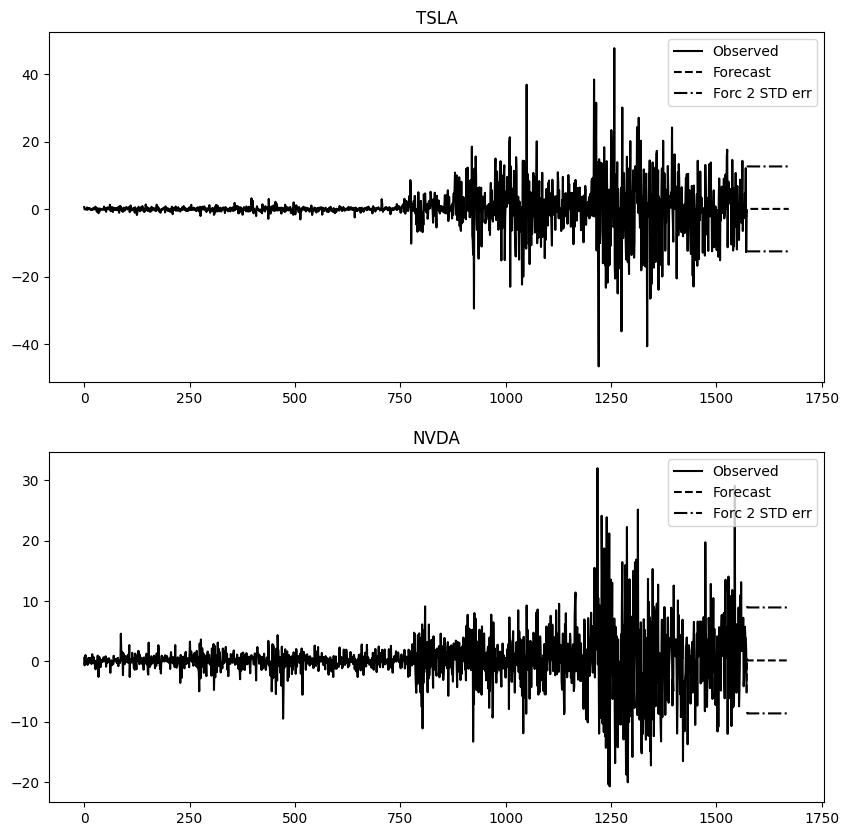

In [ ]:
# VAR Model Forecast of the Difference of the Differenced TSLA, NVDA
diff_mod_var.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.show()

In [ ]:
df.tail()

,NVDA,TSLA
Date,,
2023-03-29,269.839996,193.880005
2023-03-30,273.829987,195.279999
2023-03-31,277.769989,207.460007
2023-04-03,279.649994,194.770004
2023-04-04,274.529999,192.580002


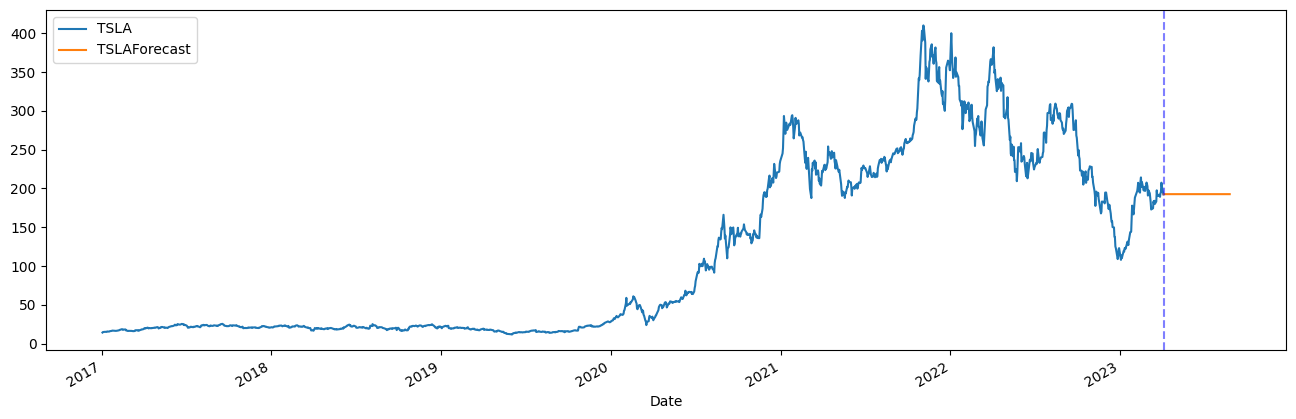

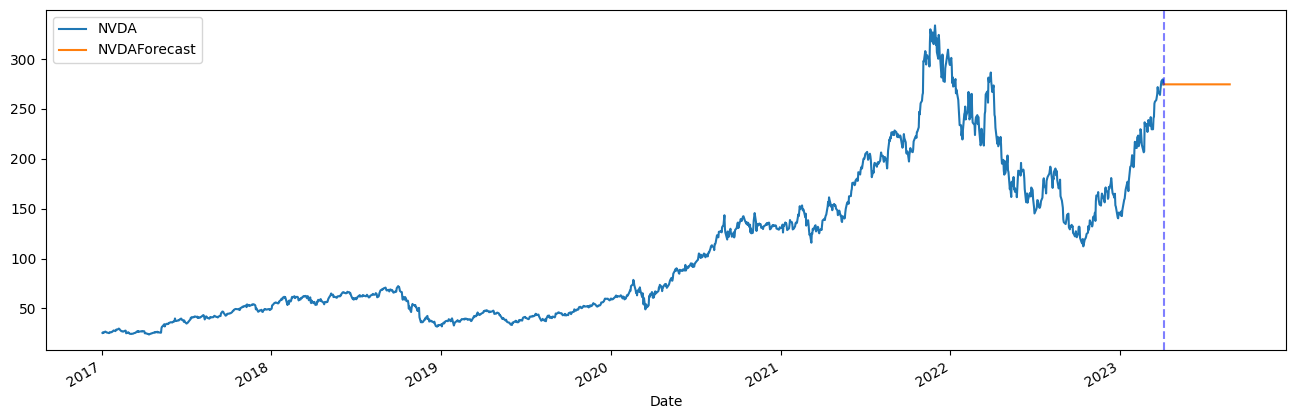

In [ ]:
# get 100 step prediction values for differenced data

diff_data_val = diff_data.values[diff_mod_var.k_ar :] 
pred = diff_mod_var.forecast(y=diff_data_val, steps=100)
pd.DataFrame(pred)

us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
idx = pd.date_range("2023-04-05", periods=100, freq=us_bd)
df_forecast = pd.DataFrame( data=pred, index=idx, columns=["TSLA1d", "NVDA1d"])

df_forecast["TSLAForecast"] = df["TSLA"].iloc[-1] + df_forecast["TSLA1d"]
df_forecast["NVDAForecast"] = df["NVDA"].iloc[-1] + df_forecast["NVDA1d"]

df["TSLA"].plot(figsize=(16, 5), legend=True)
df_forecast["TSLAForecast"].plot(legend=True)
plt.axvline(x="2023-04-05", color="b", alpha=0.5, linestyle="--")
plt.show()

df["NVDA"].plot(figsize=(16, 5), legend=True)
df_forecast["NVDAForecast"].plot(legend=True)
plt.axvline(x="2023-04-05", color="b", alpha=0.5, linestyle="--")
plt.show()
